In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "serif"

In [2]:
dataset = pd.read_csv('UCS.csv')

In [3]:
print(dataset)

    Set  Temp  P Wave        Dt  ...      σm1      σm2  Avg (σm1, σm2)  FR
0     I    25    3866  0.000000  ...  0.00000  0.00000        0.000000 NaN
1     I    25    3895  0.000000  ...  0.00000  0.00000        0.000000 NaN
2     I    25    3852  0.000000  ...  0.00000  0.00000        0.000000 NaN
3     I   250    2768  0.487365  ...  0.00000  0.00000        0.000000 NaN
4     I   250    2768  0.494970  ...  0.00000  0.00000        0.000000 NaN
..  ...   ...     ...       ...  ...      ...      ...             ...  ..
85  III  1000    1393  0.863690  ...  0.05746  1.42134        0.739400 NaN
86  III  1000    1388  0.864667  ...  0.05746  1.42134        0.739400 NaN
87  III  1000    1397  0.863918  ...  0.03648  1.81851        0.927495 NaN
88  III  1000    1388  0.864667  ...  0.03648  1.81851        0.927495 NaN
89  III  1000    1378  0.866610  ...  0.03648  1.81851        0.927495 NaN

[90 rows x 11 columns]


In [4]:
X = dataset.iloc[ : , 0:7].values
y = dataset.iloc[ : , -2].values

In [5]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.468535
 0.468535 0.475375 0.475375 0.264705 0.264705 0.111265 0.111265 0.29583
 0.29583  0.31441  0.31441  0.114    0.114    0.14866  0.14866  0.19437
 0.19437  0.401275 0.401275 0.31122  0.31122  0.358415 0.358415 0.164615
 0.164615 0.173395 0.173395 0.6767   0.6767   3.50124  3.50124  3.50124
 1.76562  1.76562  1.76562  3.925845 3.925845 3.925845 1.73518  1.73518
 1.73518  1.632015 1.632015 1.632015 1.054605 1.054605 1.054605 1.834705
 1.834705 1.834705 1.82271  1.82271  1.82271  2.027705 2.027705 2.027705
 1.31304  1.31304  1.31304  2.23438  2.23438  2.23438  1.18559  1.18559
 1.18559  0.603625 0.603625 0.603625 0.7394   0.7394   0.7394   0.927495
 0.927495 0.927495]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 5] = le.fit_transform(X[:, 5])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_prediction = regressor.predict(X_test)

In [11]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[ 0.16122639  0.        ]
 [-0.51425971  0.        ]
 [ 2.17875899  3.925845  ]
 [ 0.07709818  0.173395  ]
 [ 1.55039023  1.82271   ]
 [ 0.42459506  0.14866   ]
 [ 1.9008197   3.50124   ]
 [ 0.11999009  0.6767    ]
 [ 1.34345441  1.18559   ]
 [ 1.39999483  0.927495  ]
 [-0.42265116  0.        ]
 [ 0.69445417  0.31441   ]
 [ 0.09981465  0.401275  ]
 [ 1.43083983  1.834705  ]]


In [12]:
#plt.plot(y_test, color = 'red', label = 'Real data')
#plt.plot(y_prediction, color = 'blue', label = 'Predicted data')
#plt.xlabel('Serial number of data point in test set')
#plt.ylabel('Memory Stress (MPa)')
#plt.title('UCS Prediction')
#plt.legend()
#plt.show()

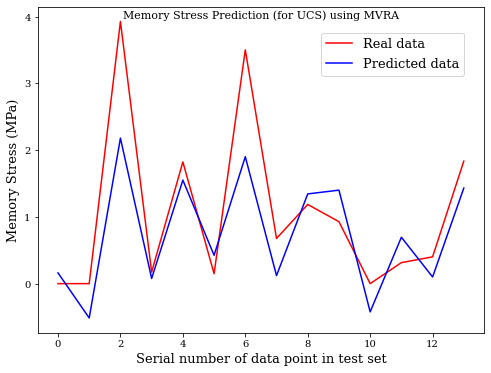

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_prediction, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for UCS) using MVRA', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("UCS (MVRA)",dpi=1500,bbox_inches = 'tight')
plt.show()

In [14]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 socre is  0.6653527811633687
mean_sqrd_error is== 0.5142027947945195
root_mean_squared error of is== 0.7170793504170369
